# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?"
foundcity =[]
clouds = []
country = []
date =[]
humi =[]
lat =[]
lng =[]
temp = []
wind = []

query_url = url + "appid=" + api_key  + "&units=imperial" + "&q="

# using random list of cities to get weather data for cities that are found in weather database
for city in cities:
    #try to find weather data for city
    try:
        response = requests.get(query_url + city).json()
        foundcity.append(response['name'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humi.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        city = city.replace("%20", " ")
        print(f"Found data for {city.title()}.")
        #when city weather data not found go to next city
    except:
        print("City not found")
    continue 
print("-------------------------------------------------------")


City not found
Found data for Taltal.
Found data for Khatanga.
Found data for Bredasdorp.
City not found
Found data for Cape Town.
Found data for Dabhol.
Found data for Jamestown.
Found data for Kruisfontein.
Found data for Kapaa.
City not found
Found data for Pacific Grove.
Found data for Litovko.
Found data for Punta Arenas.
Found data for Rikitea.
Found data for Abu Samrah.
Found data for Chifeng.
Found data for Monrovia.
Found data for Tautira.
Found data for Ushuaia.
Found data for Karasuk.
Found data for Huarmey.
Found data for Luwingu.
Found data for East London.
Found data for Provideniya.
Found data for Mataura.
Found data for Strelka.
Found data for Vaini.
Found data for Leningradskiy.
Found data for Mahebourg.
Found data for Buala.
Found data for Busselton.
City not found
City not found
Found data for Kaeo.
Found data for Jasper.
Found data for Madimba.
Found data for Svay Rieng.
Found data for Yellowknife.
Found data for Torbay.
Found data for Mayo.
Found data for Sola.
Fou

Found data for Zhuhai.
Found data for Rundu.
Found data for Tura.
Found data for Burgeo.
Found data for Katsuura.
Found data for Clyde River.
Found data for Almaznyy.
Found data for Ozu.
Found data for Camargo.
Found data for Hambantota.
Found data for Hobyo.
City not found
Found data for Padang.
Found data for Marsaxlokk.
City not found
Found data for Inhambane.
Found data for Kaduqli.
Found data for Mersing.
Found data for Banamba.
Found data for Galeana.
Found data for Elko.
Found data for Pevek.
City not found
Found data for Salinopolis.
Found data for Uige.
Found data for Paramonga.
Found data for Leshan.
Found data for Sterling.
Found data for Hovd.
Found data for Baghdad.
Found data for Mount Pleasant.
Found data for Acapulco.
City not found
Found data for Piacabucu.
Found data for Porteirinha.
Found data for Vila Franca Do Campo.
Found data for Orlik.
City not found
City not found
Found data for Ames.
Found data for Vredendal.
Found data for Bellmead.
Found data for Tuatapere.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# create a data frame from the data
weather_dict = {
    "City": foundcity,
    "Cloudiness": clouds,
    "Country": country,
    "Date": date,
    "Humidity": humi,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temp": temp,
    "Wind Speed": wind
}


weather_data = pd.DataFrame(weather_dict)
weather_data.head(20)

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Taltal,0,CL,1575404937,68,-25.41,-70.49,62.04,6.71
1,Khatanga,0,RU,1575404937,84,71.98,102.47,-26.50,9.55
2,Bredasdorp,83,ZA,1575404938,58,-34.53,20.04,55.40,4.70
3,Cape Town,0,ZA,1575404934,51,-33.93,18.42,61.00,19.46
4,Dabhol,100,IN,1575404939,68,17.60,73.17,80.31,9.80
5,Jamestown,73,AU,1575404939,89,-33.21,138.60,50.27,6.33
6,Kruisfontein,34,ZA,1575404940,73,-34.00,24.73,55.69,8.90
7,Kapaa,90,US,1575404940,88,22.08,-159.32,78.80,20.80
8,Pacific Grove,90,US,1575404941,82,36.62,-121.92,59.00,2.86
9,Litovko,100,RU,1575404942,85,49.24,135.18,0.86,9.01


In [10]:
weather_data.to_csv("CityWeatherData.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

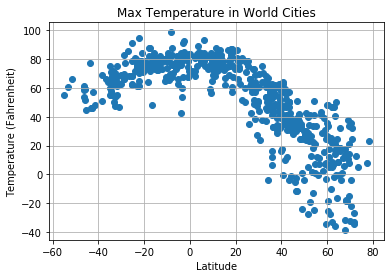

In [11]:
plt.scatter(weather_data["Latitude"], weather_data["Max Temp"], marker="o")

plt.title("Max Temperature in World Cities")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("MaxTempInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

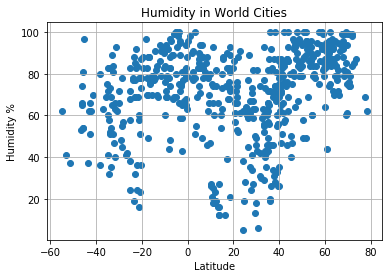

In [12]:
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o")

plt.title("Humidity in World Cities")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

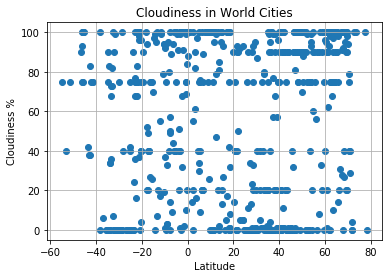

In [13]:
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o")

plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

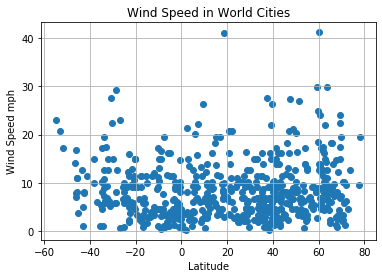

In [14]:
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o")

plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()